# Notebook pour nettoyer la donnée du datathon 2024

### Problématique : Je suis un propriétaire qui souhaite louer mon appartement, mais je ne sais pas quelle période me rapportera le plus d’argent ( évènements ou autre bonifie le prix de location).

Dataset : https://insideairbnb.com/get-the-data/

On prend les données de Lyon : 23 March, 2024 . 15 December, 2023  
Taille : environ 300 Mo

#### calendar.csv
Pour le csv calendar nos features : listing_id, date, available, price, adjusted_price, minimum_nights, maximum_nights

Types de données des colonnes:
listing_id          int64
date               object
available          object
price              object
adjusted_price    float64
minimum_nights      int64
maximum_nights      int64
dtype: object


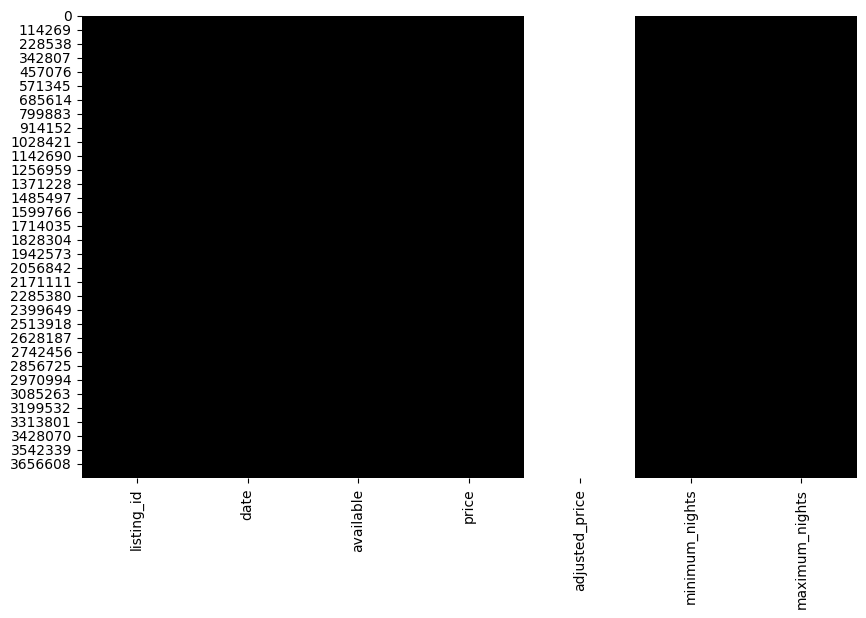

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

dataset_path = os.path.abspath('../Data')
dataset_raw_path = os.path.abspath('../Data/Raw')

# Creation de l'arborescence de fichiers pour le projet
# Définir les chemins pour les sous-dossiers Cleaned et Final

cleaned_data_path = os.path.join(dataset_path, 'Cleaned')

final_data_path = os.path.join(dataset_path, 'Final')

cleaned_december = os.path.join(cleaned_data_path, 'Data_15_Decembre_2023')
final_december =  os.path.join(final_data_path, 'Data_15_Decembre_2023')
cleaned_march = os.path.join(cleaned_data_path, 'Data_23_March_2024')
final_march = os.path.join(final_data_path, 'Data_23_March_2024')



# Créer les sous-dossiers s'ils n'existent pas
os.makedirs(cleaned_december, exist_ok=True)
os.makedirs(final_december, exist_ok=True)
os.makedirs(cleaned_march, exist_ok=True)
os.makedirs(final_march, exist_ok=True)


# Chargement du CSV
dataset_calendar = os.path.join(dataset_raw_path, 'Data_15_Decembre_2023', 'calendar.csv')

df = pd.read_csv(dataset_calendar)

# Créer une heatmap des valeurs manquantes
plt.figure(figsize=(10, 6))
sns.heatmap(
    df.isna(),
    cmap=['black', 'white'],
    cbar=False,
)

# Type des données
print("Types de données des colonnes:")
print(df.dtypes)

# Afficher la heatmap
plt.show()

On se rend compte qu'il y a un manque de donnée uniquement sur adjusted_price on drop donc la colonne et on sauvegarde le fichier cleaned

Pour le typing on observe en PowerBI que le price, est en $Number donc un string on va changer, le nom de la colonne en price_dollar et la data en number

In [4]:
# Renommer la colonne 'price' en 'price_dollar'
df.rename(columns={'price': 'price_dollar'}, inplace=True)

# Convertir les valeurs de 'price_dollar' en nombres
df['price_dollar'] = df['price_dollar'].replace('[\$,]', '', regex=True).astype(float)

# Supprimer la colonne 'adjusted_price'
df.drop(columns=['adjusted_price'], inplace=True)

# Afficher les types de données des colonnes après modification
print("Types de données des colonnes après modification:")
print(df.dtypes)

# Définir le chemin pour sauvegarder le nouveau fichier
cleaned_file_path = os.path.abspath(os.path.join(cleaned_december, 'calendar_cleaned.csv'))

# Sauvegarder le nouveau fichier CSV
df.to_csv(cleaned_file_path, index=False)
print(f"Le fichier nettoyé a été sauvegardé à l'emplacement: {cleaned_file_path}")


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\pierr\AppData\Local\Temp\ipykernel_37604\859262368.py:5: SyntaxWarning: invalid escape sequence '\$'
  df['price_dollar'] = df['price_dollar'].replace('[\$,]', '', regex=True).astype(float)


Types de données des colonnes après modification:
listing_id          int64
date               object
available          object
price_dollar      float64
minimum_nights      int64
maximum_nights      int64
dtype: object
Le fichier nettoyé a été sauvegardé à l'emplacement: c:\Users\pierr\OneDrive\Bureau\Work\CPE\5ETI\Big_Data\Datathon\datathon-2024\Data\Cleaned\Data_15_Decembre_2023\calendar_cleaned.csv


#### listing_detailed.csv

Nos features :  id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month

Enormement de features on va en drop pas mal

Types de données des colonnes:
id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object


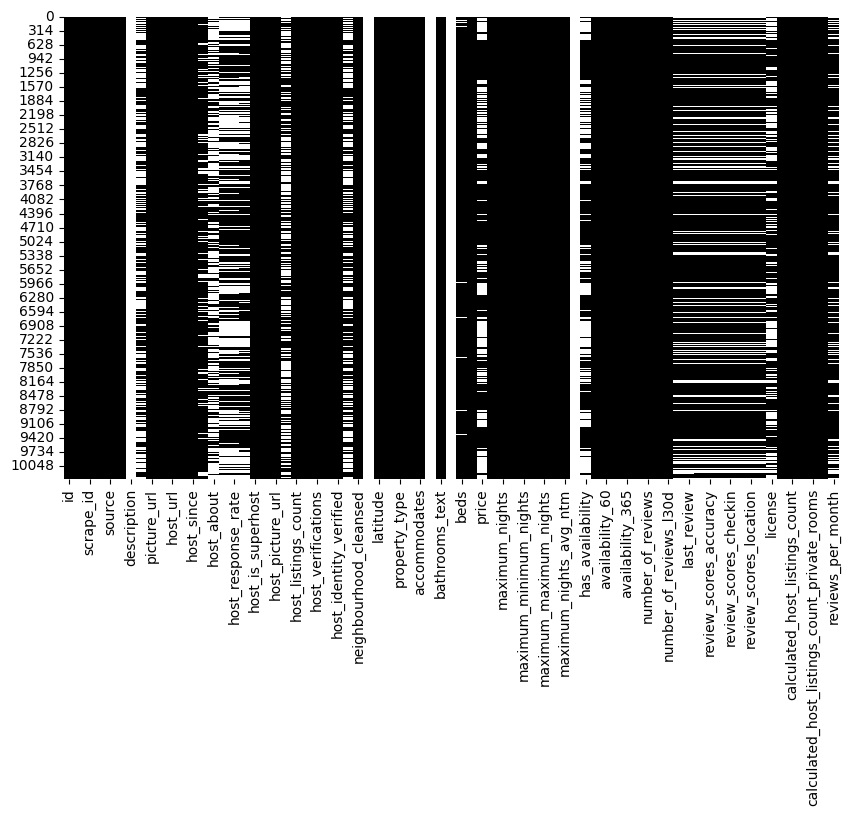

Pourcentage de valeurs manquantes par colonne:
id                                               0.000000
listing_url                                      0.000000
scrape_id                                        0.000000
last_scraped                                     0.000000
source                                           0.000000
                                                  ...    
calculated_host_listings_count                   0.000000
calculated_host_listings_count_entire_homes      0.000000
calculated_host_listings_count_private_rooms     0.000000
calculated_host_listings_count_shared_rooms      0.000000
reviews_per_month                               20.888588
Length: 75, dtype: float64
Types de données des colonnes après suppression des colonnes à plus de 50% vides:
id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                          

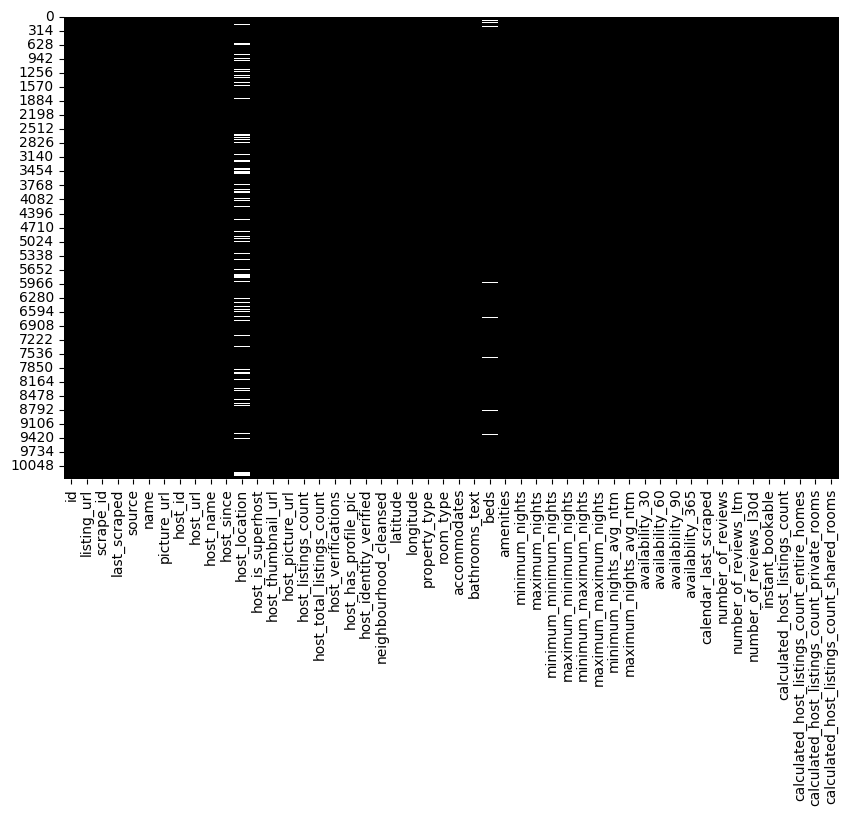

In [5]:
# Chargement du CSV
dataset_listings_detailed = os.path.join(dataset_raw_path, 'Data_15_Decembre_2023', 'listings_detailed.csv')

df = pd.read_csv(dataset_listings_detailed)

# Créer une heatmap des valeurs manquantes
plt.figure(figsize=(10, 6))
sns.heatmap(
    df.isna(),
    cmap=['black', 'white'],
    cbar=False,
)

# Type des données
print("Types de données des colonnes:")
print(df.dtypes)

# Afficher la heatmap
plt.show()

# Nouvelle cellule de code pour supprimer les colonnes à plus de 50% vides
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_percentage = df.isna().mean() * 100

# Afficher les pourcentages de valeurs manquantes
print("Pourcentage de valeurs manquantes par colonne:")
print(missing_percentage)

# Supprimer les colonnes avec plus de 20% de valeurs manquantes
df_cleaned = df.loc[:, missing_percentage <= 20]

# Afficher les types de données des colonnes après suppression
print("Types de données des colonnes après suppression des colonnes à plus de 50% vides:")
print(df_cleaned.dtypes)

# Créer une heatmap des valeurs manquantes après suppression
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_cleaned.isna(),
    cmap=['black', 'white'],
    cbar=False,
)

# Afficher la heatmap après suppression
plt.show()

In [6]:
# Nous avons 
# Imprimer les features restantes
print("Features restantes après suppression des colonnes à plus de 50% vides:")
print(df_cleaned.columns.tolist())

Features restantes après suppression des colonnes à plus de 50% vides:
['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'beds', 'amenities', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_ent

C:\Users\pierr\AppData\Local\Temp\ipykernel_37604\4136757169.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=columns_to_drop, inplace=True, errors='ignore')


Types de données des colonnes après suppression des colonnes à plus de 50% vides et des colonnes spécifiées:
id                          int64
listing_url                object
scrape_id                   int64
last_scraped               object
source                     object
name                       object
picture_url                object
host_id                     int64
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
accommodates                int64
bathrooms_text             object
availability_365            int64
dtype: object


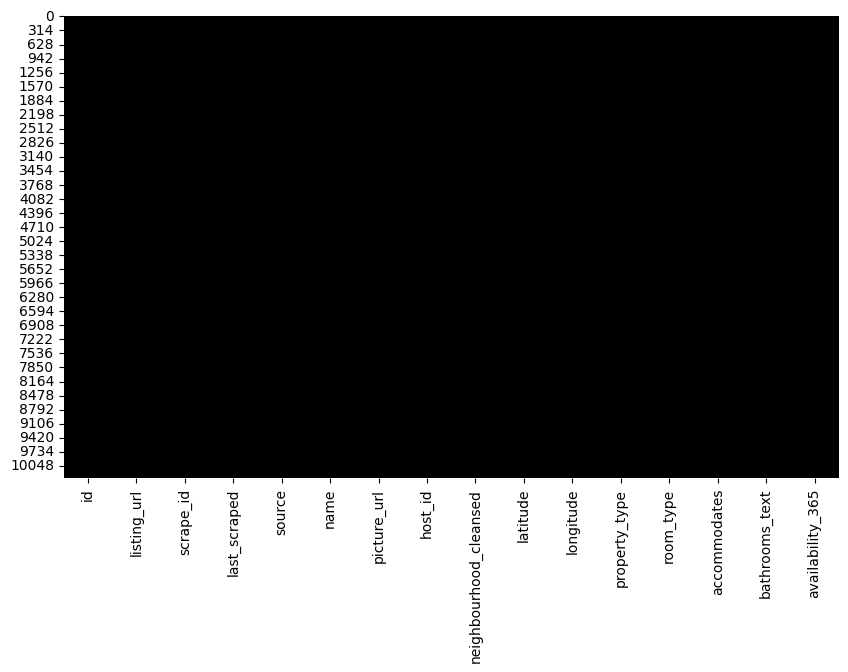

Features restantes après suppression des colonnes à plus de 50% vides et des colonnes spécifiées:
['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'picture_url', 'host_id', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'availability_365']


In [11]:
# Supprimer les colonnes spécifiées
columns_to_drop = [
    'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 
    'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
    'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
    'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 
    'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
    'availability_30', 'availability_60', 'availability_90', 'amenities', 'host_location', 'beds', 'host_is_superhost',
    'host_url', 'host_name', 'host_since', 'host_thumbnail_url',
    'host_picture_url', 'host_listings_count', 'host_total_listings_count',
    'host_verifications', 'host_has_profile_pic', 'host_identity_verified'
]

df_cleaned.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Afficher les types de données des colonnes après suppression
print("Types de données des colonnes après suppression des colonnes à plus de 50% vides et des colonnes spécifiées:")
print(df_cleaned.dtypes)

# Créer une heatmap des valeurs manquantes après suppression
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_cleaned.isna(),
    cmap=['black', 'white'],
    cbar=False,
)

# Afficher la heatmap après suppression
plt.show()

# Imprimer les features restantes
print("Features restantes après suppression des colonnes à plus de 50% vides et des colonnes spécifiées:")
print(df_cleaned.columns.tolist())

In [12]:
# On sauvegarde dans le cleaned_data_path:

# Définir le chemin pour sauvegarder le nouveau fichier
cleaned_file_path = os.path.abspath(os.path.join(cleaned_december, 'listings_detailed_cleaned.csv'))

# Sauvegarder le nouveau fichier CSV
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Le fichier nettoyé a été sauvegardé à l'emplacement: {cleaned_file_path}")

Le fichier nettoyé a été sauvegardé à l'emplacement: c:\Users\pierr\OneDrive\Bureau\Work\CPE\5ETI\Big_Data\Datathon\datathon-2024\Data\Cleaned\Data_15_Decembre_2023\listings_detailed_cleaned.csv
